**Importing Required Libraries**

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# load dataset
pima = pd.read_csv("diabetes.csv")

In [ ]:
pima.head()
 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148             72             35        0  33.6   
1          1.0       85             66             29        0  26.6   
2          8.0      183             64              0        0  23.3   
3          1.0       89             66             23       94  28.1   
4          0.0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']

X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

**Splitting Data**

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Building Decision Tree Model**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Evaluating Model**

In [ ]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
 
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.658008658008658


# Visualizing Decision Trees

In [ ]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 129.50
|   |--- feature_2 <= 26.30
|   |   |--- feature_2 <= 9.10
|   |   |   |--- feature_3 <= 28.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  28.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  9.10
|   |   |   |--- feature_6 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.67
|   |   |   |   |--- feature_6 <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.71
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  26.30
|   |   |--- feature_3 <= 27.50
|   |   |   |--- feature_2 <= 45.40
|   |   |   |   |--- feature_5 <= 12.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  12.00
|   |   |   |   |   |--- feature_0 <= 7.00
|   |   |   |   |   |   |--- feature_6 <= 1.27
|   |   |   |   |   |   |   |--- feature_2 <= 30.95
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  30.95
|   |   |   |   |   |   |   |   |--- feature_5 <= 53.00
|

==========================================================================

==========================================================================

==========================================================================

# Drug Classification

Content

The target feature is

Drug type

The feature sets are:

Age

Sex

Blood Pressure Levels (BP)

Cholesterol Levels

Na to Potassium Ration

In [72]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

**Importing data**

In [76]:
df = pd.read_csv('drug200.csv') 

print(cl(df.head(), attrs = ['bold']))

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Data Processing**

In [78]:

for i in df.Sex.values:
    if i  == 'M':
        df.Sex.replace(i, 0, inplace = True)
    else:
        df.Sex.replace(i, 1, inplace = True)

for i in df.BP.values:
    if i == 'LOW':
        df.BP.replace(i, 0, inplace = True)
    elif i == 'NORMAL':
        df.BP.replace(i, 1, inplace = True)
    elif i == 'HIGH':
        df.BP.replace(i, 2, inplace = True)

for i in df.Cholesterol.values:
    if i == 'LOW':
        df.Cholesterol.replace(i, 0, inplace = True)
    else:
        df.Cholesterol.replace(i, 1, inplace = True)

print(cl(df, attrs = ['bold']))

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    1   2            1   25.355  DrugY
1     47    1   0            1   13.093  drugC
2     47    1   0            1   10.114  drugC
3     28    1   1            1    7.798  drugX
4     61    1   0            1   18.043  DrugY
..   ...  ...  ..          ...      ...    ...
195   56    1   0            1   11.567  drugC
196   16    1   0            1   12.006  drugC
197   52    1   1            1    9.894  drugX
198   23    1   1            1   14.020  drugX
199   40    1   0            1   11.349  drugX

[200 rows x 6 columns]


**Splitting the data**

In [81]:
X_var = df[['Sex', 'BP', 'Age', 'Cholesterol', 'Na_to_K']].values # independent variable
y_var = df['Drug'].values # dependent variable

print(cl('X variable samples : {}'.format(X_var[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))

X variable samples : [[ 1.     2.    23.     1.    25.355]
 [ 1.     0.    47.     1.    13.093]
 [ 1.     0.    47.     1.    10.114]
 [ 1.     1.    28.     1.     7.798]
 [ 1.     0.    61.     1.    18.043]]
Y variable samples : ['DrugY' 'drugC' 'drugC' 'drugX' 'DrugY']


We can now split our data into a training set and testing set with our defined X and Y variables by using the ‘train_test_split’ algorithm in scikit-learn. Follow the code to split the data in python.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold'] ))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold']))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold']))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold']))

X_train shape : (160, 5)
X_test shape : (40, 5)
y_train shape : (160,)
y_test shape : (40,)


**Building the model & Predictions**

In [86]:
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))


Accuracy of the model is 95%


**Visualizing the model**

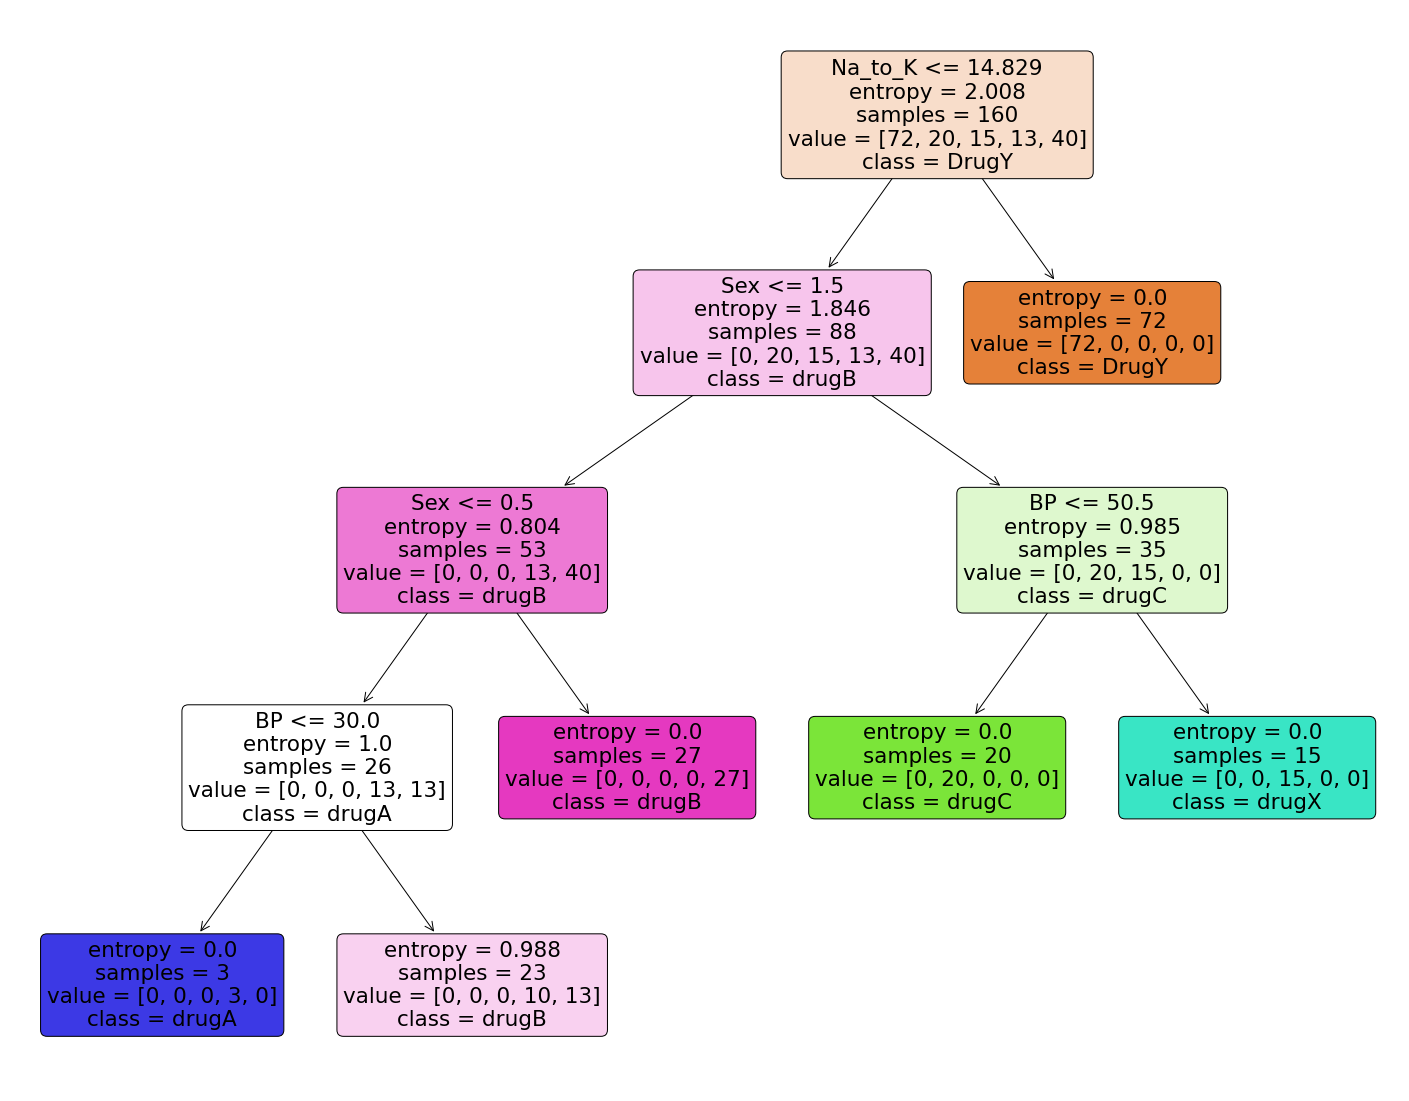

In [87]:
feature_names = df.columns[:5]
target_names = df['Drug'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 